<a name="inicio"></a>

***

<div style="font-size: 30px;text-align: center;height:60px;padding:10px;margin:10px 0 0 0;">Lab 3.2 Estimación modelos de regresión lineal múltiple en Python</div>

<table>
  <tr>
    <td>
<div>
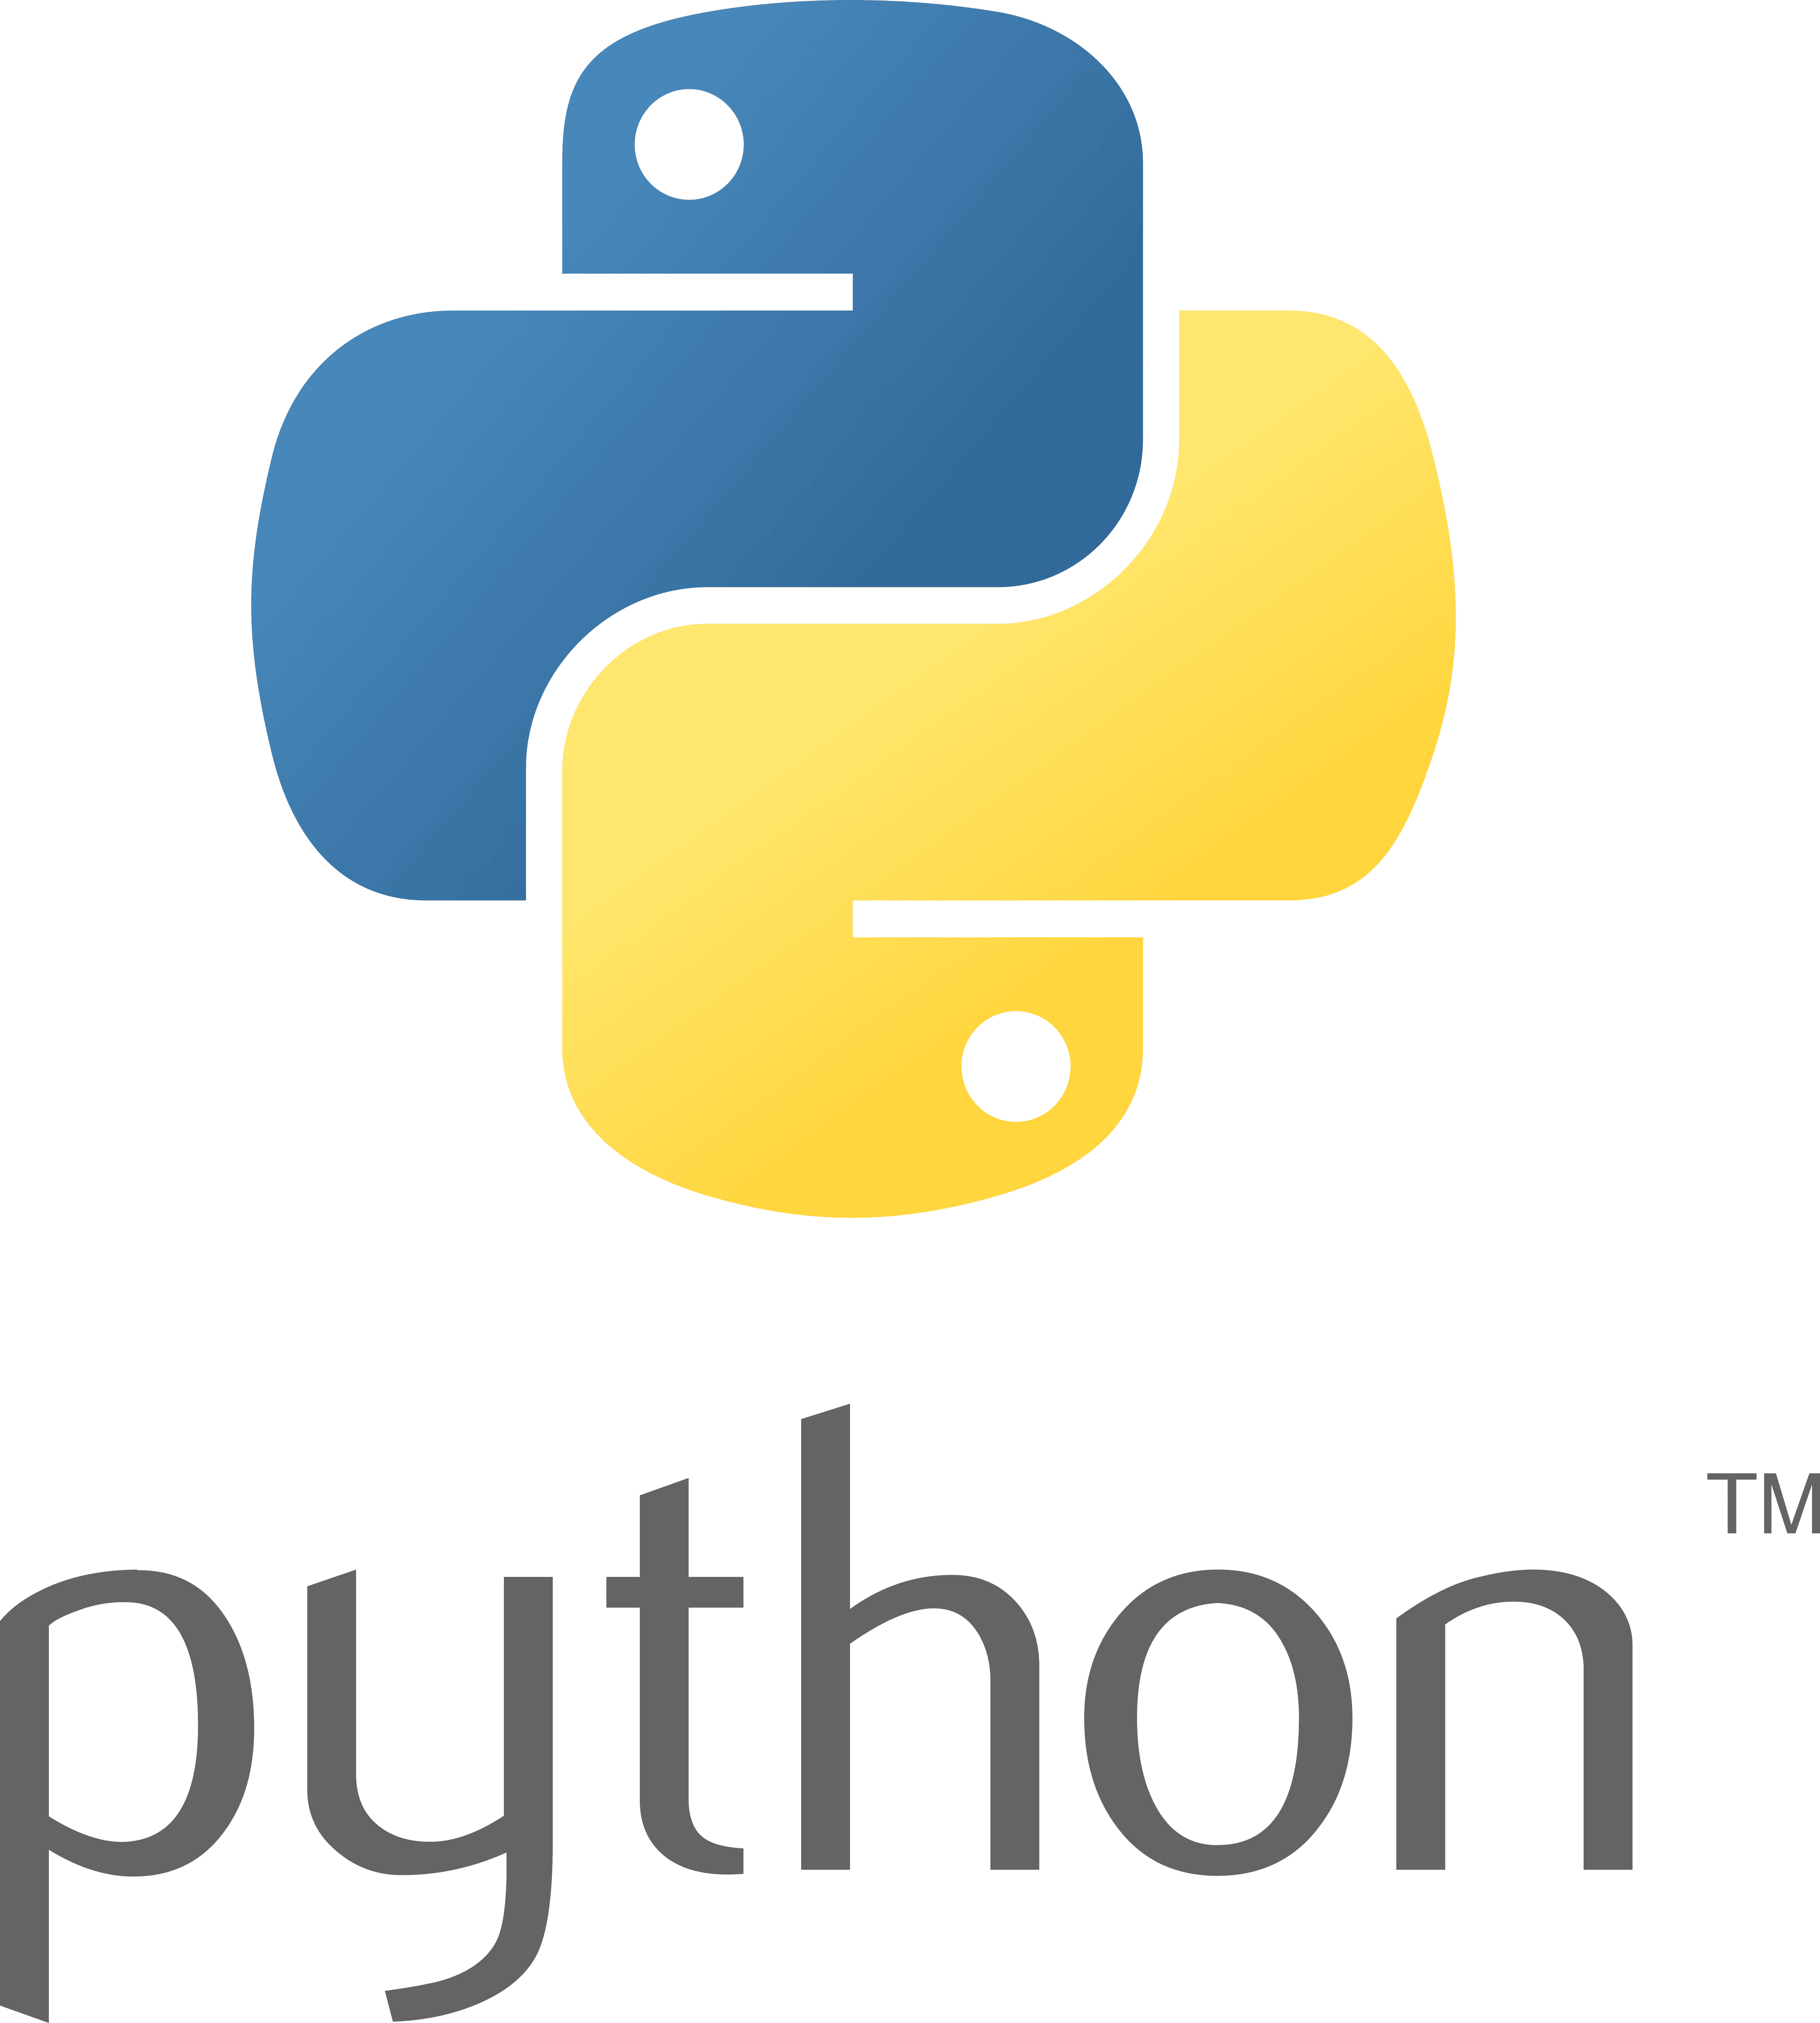
<td>&nbsp;</td><td>&nbsp;</td>
</div>
    </td>
    <td>
<div>
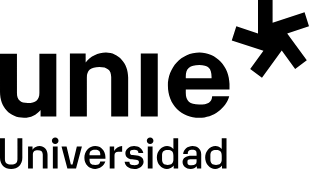
</div>       
</td>
  </tr>
<table>
    
**Nombre:**

* *Jose Auza Castilla*


# Instrucciones de la prueba

Este documento corresponde al **Laboratorio 3.2** que deben realizar abarcando los conceptos vistos en el **Notebook 3.2**.


### Ejercicio 1 

Considerar la información de la base de datos `airquality` de la librería **statsmodels**, que consiste en 154 medidas (de 6 variables) de calidad del aire en Nueva York en los últimos tiempos. La variable dependiente `Ozone`, que es la concentración media de ozono en la atmósfera (en ppb, partes por billón), se quiere explicar a partir de las variables independientes `Temp`, `Solar.R`, `Wind`, que nos indican la temperatura máxima diaria (en grados Fahrenheit), la radiación solar medida en langleys por día y la velocidad promedio del viento en millas por hora (mph), respectivamente. Realizar los siguientes apartados:

1. Exploración inicial de la base de datos <mark>(**¡IMPORTANTE!** Recuerda tratar los valores nulos `np.nan`. En este caso sustitúyelos por el valor medio utilizando el método `fillna`. Busca en la documentación [link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html))</mark>
2. Análisis de la existencia de relación lineal entre las variables
3. Estimación de un modelo de regresión lineal multiple entre las variables
4. Interpretación de las salidas de estimación de un modelo de regresión lineal múltiple
   1. ¿Cuáles son los **coeficientes de regresión estimados**?
   2. ¿Cuáles son los **valores ajustados** de la variable dependiente?
   3. ¿Cuáles son los **residuos estimados**?
   4. ¿Cuáles son los **grados de libertad**?
   5. Medir la **discrepancia entre los valores observados y los valores predichos** en términos de:
      - Error Absoluto Medio (MAE)
      - Error Cuadrático Medio (MSE)
      - Raiz del Error Cuadrático Medio (RMSE)
      - Coeficiente de Determinación ($R^2$)
      - Error Relativo Medio (MAPE).
5. Compara los resultados anteriores con aquellos obtenidos utilizando la regresión lineal simple en el Lab 3.1.

<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 01</b></div>

<div style="background-color:#5DADE2"><b>Apartado 1: Exploración inicial de la base de datos</b></div>

In [2]:
from statsmodels.api import datasets
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

airquality= datasets.get_rdataset('airquality').data 

#airquality.info()

airquality.columns

airquality_recortado= airquality[['Ozone','Temp','Solar.R','Wind']]
airquality_recortado.info()

airquality_recortado.info()
#help(pd.DataFrame.fillna)

valores_reemplazo= {'Ozone': np.mean(airquality_recortado['Ozone']), 'Solar.R': np.mean(airquality_recortado['Solar.R'])}
airquality_recortado = airquality_recortado.fillna(valores_reemplazo)


# 2 opcion para rellenar, mejor.
#airquality_recortado= airquality_recortado.fillna(airquality_recortado.mean())
airquality_recortado.info()


airquality_recortado.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Temp     153 non-null    int64  
 2   Solar.R  146 non-null    float64
 3   Wind     153 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 4.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Temp     153 non-null    int64  
 2   Solar.R  146 non-null    float64
 3   Wind     153 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 4.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    153 non-null    float64
 1   Temp     153 

,Ozone,Temp,Solar.R,Wind
count,153.000000,153.000000,153.000000,153.000000
mean,42.129310,77.882353,185.931507,9.957516
std,28.693372,9.465270,87.960267,3.523001
min,1.000000,56.000000,7.000000,1.700000
25%,21.000000,72.000000,120.000000,7.400000
50%,42.129310,79.000000,194.000000,9.700000
75%,46.000000,85.000000,256.000000,11.500000
max,168.000000,97.000000,334.000000,20.700000


R\ se importa la misma base de daros del lab 1 y en este caso usando fillna rellenamos para las variables ozone y solar, los espacios nulos con la media en vez de eliminarlos, de esta manera a diferencia del lab anterior que trabajamos con 116 observaciones trabajaremos con 153, teniendo en cuenta el tratamiento dado a los datos.

<div style="background-color:#5DADE2"><b>Apartado 2: Análisis de la existencia de relación lineal entre las variables</b></div>

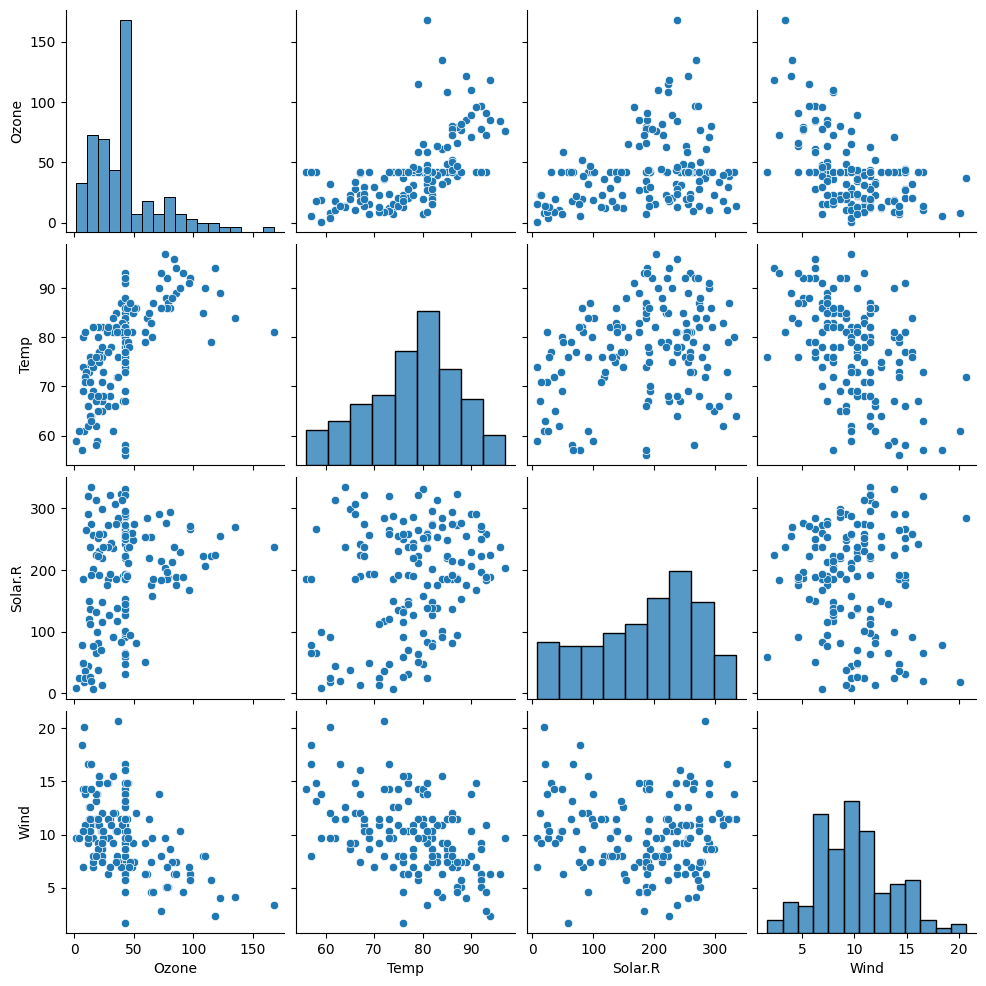

Temp: coef: 0.608742005973355 valor_p: 6.971076202667352e-17

Solar.R: coef: 0.30296951134425104 valor_p: 0.00014085767169437708

Wind: coef: -0.5309358367409771 valor_p: 1.667333326709034e-12


In [3]:
from scipy.stats import pearsonr

sns.pairplot(airquality_recortado)
plt.show()


coef_1, valor_p1 = pearsonr(airquality_recortado['Ozone'], airquality_recortado['Temp'])
print('Temp:',f'coef: {coef_1}', f'valor_p: {valor_p1}')

coef_2, valor_p2 = pearsonr(airquality_recortado['Ozone'], airquality_recortado['Solar.R'])
print('\nSolar.R:',f'coef: {coef_2}', f'valor_p: {valor_p2}')

coef_3, valor_p3 = pearsonr(airquality_recortado['Ozone'], airquality_recortado['Wind'])
print('\nWind:',f'coef: {coef_3}', f'valor_p: {valor_p3}')



R\ graficamente observamos que la dispersion de los datos con respecto al ozono para las 3 variables independiente no parece ser del todo aleatoria, lo cual es un indicio de una posible correlacion. Esto lo comprobamos despues con la respectiva prueba estadistica de pearson, en la cual uno a uno comprobamos que los valores p son menores a cualquier nivel de significancia posible, por lo cual se rechaza la Ho y se confirma que cada una de las variables independientes esta correlacionada con el Ozono. 

<div style="background-color:#5DADE2"><b>Apartado 3: Estimación de un modelo de regresión lineal múltiple entre las variables</b></div>

In [4]:
from sklearn.linear_model import LinearRegression
x= airquality_recortado[['Solar.R','Temp','Wind']]
y= airquality_recortado['Ozone']
modelo = LinearRegression()

modelo.fit(x,y)

print(modelo.intercept_)
print(modelo.coef_)

print('ozono = -38.22 + 0.057 *Solar.R + 1.2412* Temp - 2.71*Wind')

-38.22315455019556
[ 0.05774735  1.24126292 -2.71725024]
ozono = -38.22 + 0.057 *Solar.R + 1.2412* Temp - 2.71*Wind


R\ en este caso tenemos el modelo, en el cual la variable dependiente ozono sera igual a la ecuacion descrita, teniendo en cuenta el intercepto calculado por el modelo y los respectivos coeficientes de cada variable.

El intercepto se interpreta como el valor teorico que tomaria el ozono si las variables independiente todas fuesen cero, este valor es solo una interpretacion teorica ya que es dificil que eso suceda.

Los coeficientes se interpretan distinto, cada uno representa el incremento esperado por un aumento de una unidad en su respetiva variable manteniendo el resto constante. Por ejemplo si la temperatura aumenta 1 unidad esperariamos un aumento de 1.24 unidades en la vble depenidnete osea el ozono, si el resto de variables permanecene constantes. Para el Solar.R seria la misma interpretacion de manteniendo el resto de variables constantes un aumento de una unidad, representa un incremeento de 0.057 en el ozono, mientras que para el viento por cada incremento de una unidad en esta medida, con el resto de variables independientes constantes, el ozono disminuiria 2.71 unidades



<div style="background-color:#5DADE2"><b>Apartado 4: Interpretación de las salidas de estimación de un modelo de regresión lineal múltiple</b></div>

In [5]:
#Interpretación de las salidas de estimación de un modelo de regresión lineal múltiple
#¿Cuáles son los coeficientes de regresión estimados?
#¿Cuáles son los valores ajustados de la variable dependiente?
#¿Cuáles son los residuos estimados?
#¿Cuáles son los grados de libertad?

print(f'intercepto: {modelo.intercept_}')
print(f'Coeficiente Solar.R: {modelo.coef_[0]}')
print(f'Coeficiente Temp: {modelo.coef_[1]}')
print(f'Coeficiente Wind: {modelo.coef_[2]}')

y_ajustado = modelo.predict(x)
print(f'\nValores ajustados:{y_ajustado}')

residuos= y-y_ajustado
print(f'\nresiduos:\n{residuos}')

verificacion= y- (y_ajustado+residuos)
print(f'\n verificacion:\n{verificacion}')

grados_totales= airquality_recortado.shape[0]-1
grados_modelo = x.shape[1]
grados_residuales = grados_totales - grados_modelo

print(f'\ngrados libertad totales:{grados_totales}')
print(f'\ngrados libertad modelo:{grados_modelo}')
print(f'\ngrados libertad residuales:{grados_residuales}')

intercepto: -38.22315455019556
Coeficiente Solar.R: 0.057747349318854786
Coeficiente Temp: 1.2412629210845076
Coeficiente Wind: -2.717250242889361

Valores ajustados:[ 35.80580574  36.22396104  27.9973036   25.5616891    3.16794223
  13.9502213   36.35704068   3.23029202 -16.02564661  35.25862068
  45.61832661  35.84998107  35.44822731  32.38747015   1.65596937
  29.25690928  28.82163157 -12.96427927  33.52899277  14.91870257
   9.11600923  25.76183644  12.58024001  10.19963686  -8.76619703
   8.64386117  21.52788168  13.08517379  36.38444547  57.22594873
  52.11668611  51.74274311  43.84646351  15.16859079  51.78523556
  56.6202585   36.22523796  44.53699099  66.78271927  52.79693365
  57.17073562  62.55283294  65.41116928  50.36901073  42.75194576
  47.1828849   27.89680547  11.30094295  19.59688501  28.07034281
  36.03653681  48.89751624  54.90059565  48.86848512  53.43098825
  40.92945475  44.19126471  27.11548661  35.48874158  18.65722958
  51.03280016  70.43624179  56.60683414  5

In [6]:
#Medir la discrepancia entre los valores observados y los valores predichos en términos de:
#Error Absoluto Medio (MAE)
#Error Cuadrático Medio (MSE)
#Raiz del Error Cuadrático Medio (RMSE)
#Coeficiente de Determinación ()
#Error Relativo Medio (MAPE).

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MAE= mean_absolute_error(y,y_ajustado)
print(f'MAE:{MAE}')

MSE = mean_squared_error(y,y_ajustado)
print(f'\nMSE:{MSE}')

RMSE= np.sqrt(MSE)
print(f'\nRMSE:{RMSE}')

r2= modelo.score(x,y)
print(f'\nr2:{r2}')

MAPE = np.mean(np.abs((y - y_ajustado) / y)) * 100
print(f'\nMAPE:{MAPE:.2f}%')



MAE:15.751698197097346

MSE:425.30196636730415

RMSE:20.622850587814096

r2:0.4800254950222891

MAPE:64.84%


R\ se calculan los residuos a partir de predecir los valores de y usando el modelo y los valores de x que se tienen, se verifica que los residuos son cero, se calculan los grados de libertad y los coeficientes e el intercepto tambien, cuya interpretacion se describio anteriormente.

Se calculan las metricas del modelo, en este caso tenemos un 48% para el r2 el cual no es el mejor de los resultados, ya que el modelo solo es capaz de explicar el 48% del comportamiento de la vble respuesta. El MAE y RMSE estan en la misma escala que la vble respuesta y nos indican que en promedio las predicciones estan desviadas en 15.75 unidades y 20.6 unidades respectivamente. EL MSE que es el promedio de los errores al cuadrado es un numero bastante alto, lo cual nos da una alerta de que el modelo puede presentar errores significativos, lo cual se respalda con el MAPE que nos dice que en el promedio de las tasas de error del modelo es del 65%

<div style="background-color:#5DADE2"><b>Apartado 5: Comparación entre Regresión Lineal Simple y Regresión Lineal Múltiple</b></div>

Metricas regresion lineal simple = MAE:17.21 MSE:552.67 r2:0.4877 RMSE:23.51 MAPE:74.83 %

Comparando las metricas nos damos cuenta que el r2 del modelo lineal simple es mayor, lo cual no es un indicativo favorable para el modelo actual, ya que esto nos indica que con una sola variable se esta siendo capaz de explicar mejor el comportamiento del ozono que cuando le añadimos las dos variables adicionales del modelo actual. Esto sin tener en cuenta que el r2 no esta ajustado para tener en cuenta el efecto de mas parametros, que disminuiran su valor, pero tambien cabe resaltar que aqui tenemos mas observaciones ya que no eliminamos nulos sino que los tratamos.Podemos ver que el MAE,MSE, RMSE y MAPE disminuyen en el modelo actual pero eso unicamente se debe a que el modelo actual intenta ajustarse mejor a los datos que se tienen, usando las variables adicionales ingresadas, sin que necesariamente estas sean significativas.  

En resumen, al agregar mas parametros el modelo los usa para ajustarse mejor a los datos que se tienen, pero no representan realmente un aumento significativo en la eficacia del modelo para predecir la variable ozono, este mejor ajuste a los datos actuales se refleja en mejores metricas pero cuando se tengan nuevos datos los coeficientes que ajusto para acomodarse mejor a estos datos actuales, no le haran bien a la prediccion. POr intuicion se podria probar intentando sacar a solar.R que tiene un coeficiente bajo y puede que unicamente este agregando este ruido mencionado al modelo.



### Ejercicio 2

Utilizando el dataset del ejercicio anterior encontrar el mejor modelo de regresión lineal múltiple para la variable dependiente `Ozone` en función de las siguientes variables independientes: `Temp` que nos indica la temperatura máxima diaria (en grados Fahrenheit), `Solar.R` que mide la radiación solar (en Ly, Langleys), `Wind` que recoge la información sobre la velocidad media del viento (en mph, millas por hora), `Month` que recoge el mes del año (codificado como un número entero, i.e., 5 = mayo, 6 = junio, etc.) y `Day` que recoge el día del mes. 

Automatiza la búsqueda de que conjunto de variables independientes explican mejor la variable dependiente `Ozone` utilizando el algoritmo **SFFS (Sequential Floating Forward Selection)** de la librería `mlxtend` ([http://rasbt.github.io/mlxtend/](http://rasbt.github.io/mlxtend/)), tal y como vimos en el apartado 3 del Notebook teórico 3.2. Comparar sus métricas y realizar la diagnosis del modelo de regresión lineal elegido en base los criterios de selección $R^2_{adj}$, $AIC$ y $BIC$.

1. Automatización del proceso de selección del mejor modelo

<mark>**Nota!-** Recuerda tratar (valores medio) los valores `np.nan` de todas las variables independientes</mark>

<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 02</b></div>

<div style="background-color:#5DADE2"><b>Apartado 1: Automatización del proceso de selección del mejor modelo</b></div>

In [7]:
airquality.info()
print(f'\nshape:{airquality.shape}')

airquality_test= airquality.fillna(airquality.mean(numeric_only=True))
airquality_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB

shape:(153, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    153 non-null    float64
 1   Solar.R  153 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


In [8]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import statsmodels.api as sm

y= airquality_test['Ozone']
X= airquality_test.drop(columns='Ozone')


In [9]:
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

In [10]:
def calculate_aic_bic(X, y):
    ols_model = sm.OLS(y, sm.add_constant(X)).fit()
    return ols_model.aic, ols_model.bic, adjusted_r2(ols_model.rsquared, len(y), X.shape[1])

In [11]:
for k in range(1,X.shape[1]+1):
    model= LinearRegression()

    sffs = SFS(model,k_features=k, forward=True,floating=True, scoring= 'r2',cv=None)
    sffs= sffs.fit(X,y)

    best_features= list(sffs.k_feature_names_)

    X_selected= X[best_features]
    model.fit(X_selected,y)

    r2 = r2_score(y, model.predict(X_selected))
    aic, bic, r2_adj = calculate_aic_bic(X_selected, y)

       # Mostramos los resultados
    print(f"- La combinación de {k} variables independientes {best_features} obtuvo: R2={r2}, R2 Adj={r2_adj}, AIC={aic} y BIC={bic}\n")
    


- La combinación de 1 variables independientes ['Temp'] obtuvo: R2=0.37056682983646416, R2 Adj=0.3663983982459772, AIC=1393.5026084569167 y BIC=1399.5634842997017

- La combinación de 2 variables independientes ['Wind', 'Temp'] obtuvo: R2=0.45101541987219373, R2 Adj=0.4436956254704896, AIC=1374.5799608796524 y BIC=1383.6712746438297

- La combinación de 3 variables independientes ['Solar.R', 'Wind', 'Temp'] obtuvo: R2=0.4800254950222892, R2 Adj=0.4695562096871674, AIC=1368.2735032976047 y BIC=1380.3952549831745

- La combinación de 4 variables independientes ['Solar.R', 'Wind', 'Temp', 'Month'] obtuvo: R2=0.4862366464720618, R2 Adj=0.47235115043076614, AIC=1368.4348986648715 y BIC=1383.5870882718336

- La combinación de 5 variables independientes ['Solar.R', 'Wind', 'Temp', 'Month', 'Day'] obtuvo: R2=0.49272836679172294, R2 Adj=0.475474229607768, AIC=1368.489330480444 y BIC=1386.6719580087988



In [12]:
#prueba
from math import log
modelo.coef_
n= y.shape[0]
k= x.shape[1]

ssr= np.sum((y-y_ajustado)**2)
aic = n * log(ssr / n) + 2 * k
bic = n * log(ssr / n) + k * log(n)

print(aic, bic)
r2_score(y,y_ajustado)


932.078312136975 941.1696259011524


0.4800254950222891

R\ se realiza el algoritmo y se selecciona el modelo con 3 variables trabajado en el pinto 1 ya que tiene los menores valores de aic y bic y un R2 ajustado que va aumentando en cada iteracion. A pesar de que aumenta en las sgts iteraciones, ta,bien lo hacen los valores de BIC y AIC, estas variables tienen en cuenta en su calculo la inclusion de mas parametros para trabajar con la suma de cuadrados de los residuos (SSR), lo que nos indica que el modelo esta ganando ruido en variables que aumentan el r2 debido a que sobreajustan el modelo a los datos actuales, pero que realmemte no tienen incidencia sobre la variable respuesta.

### Ejercicio 3

El dataframe `Boston` contiene información de propiedades inmobiliarias de la ciudad de Boston. Cada propiedad está caracterizada por 13 variables que indican las características de la misma, así como por la variable `MEDV` que representa una estimación del valor de la propiedad en miles de dólares. Considerando la variable dependiente `MEDV` en función de las variables independientes `CRIM`, `RM` y `LSTAT`, que representan la tasa de crimen per capita de los distritos a los que pertenece cada una de las viviendas, el número promedio de habitaciones por vivienda y el porcentaje de la población con bajo estatus socioeconómico, respectivamente, realizar los siguientes apartados:

Para cargar la librería `Boston` utilizaremos el fichero `boston.csv` que tendremos que tener almacenado localmente en el mismo directorio de este notebook:

`boston_df = pd.read_csv('boston.csv', sep=',', header=0)` 

1. Exploración inicial de la base de datos <mark>(**¡IMPORTANTE!** Recuerda tratar los valores nulos `np.nan`. En este caso sustitúyelos (si los hubiera) por el valor medio utilizando el método `fillna`. Busca en la documentación [link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html))</mark>
2. Análisis de la existencia de relación lineal entre las variables
3. Estimación de un modelo de regresión lineal múltiple entre las variables
4. Interpretación de las salidas de estimación de un modelo de regresión lineal múltiple
   1. ¿Cuáles son los **coeficientes de regresión estimados**?
   2. ¿Cuáles son los **valores ajustados** de la variable dependiente?
   3. ¿Cuáles son los **residuos estimados**?
   4. ¿Cuáles son los **grados de libertad**?
   5. Medir la **discrepancia entre los valors observados y los valores predichos** en términos de:
      - Error Absoluto Medio (MAE)
      - Error Cuadrático Medio (MSE)
      - Raiz del Error Cuadrático Medio (RMSE)
      - Coeficiente de Determinación ($R^2$)
      - Error Relativo Medio (MAPE).
5. Compara los resultados anteriores con aquellos obtenidos utilizando la regresión lineal simple en el Lab 3.1.

#### <mark>Descripción de las columnas del conjunto de datos Boston Housing</mark>

- **CRIM**:  Tasa de criminalidad per cápita por ciudad (o distrito).
- **ZN**:  Proporción de terrenos residenciales destinados a lotes de más de 25,000 pies cuadrados.
- **INDUS**: Proporción de acres de negocios no minoristas por ciudad.
- **CHAS**: Variable binaria que indica si la zona limita con el río Charles:  
  - `1`: El área limita con el río.  
  - `0`: El área no limita con el río.
- **NOX**:  Concentración de óxidos nítricos (en partes por 10 millones).
- **RM**:  Número promedio de habitaciones por vivienda.
- **AGE**: Proporción de unidades ocupadas por sus propietarios que se construyeron antes de 1940.
- **DIS**: Distancias ponderadas a cinco centros de empleo de Boston.
- **RAD**: Índice de accesibilidad a carreteras radiales.
- **TAX**: Tasa impositiva sobre el valor total de la propiedad por cada \$10,000.
- **PTRATIO**: Relación entre el número de alumnos y profesores por ciudad.
- **B**: Medida que representa la proporción de población afroamericana en la ciudad:  
  - Fórmula: $1000(B_k - 0.63)^2$, donde $B_k$ es la proporción de población afroamericana.
- **LSTAT**: Porcentaje de la población con bajo estatus socioeconómico.
- **MEDV**: Valor medio de las viviendas ocupadas por sus propietarios (en miles de dólares).

<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 03</b></div>

<div style="background-color:#5DADE2"><b>Apartado 1: Exploración inicial de la base de datos</b></div>

In [13]:
boston_df = pd.read_csv('boston.csv', sep=',', header=0)
boston_df

boston_df.info()
print(f'\nshape: {boston_df.shape}')
print(f'\ncolumns: {boston_df.columns}')

print(boston_df.describe())

boston_df_recortado= boston_df[['MEDV','CRIM','RM','LSTAT']]
boston_df_recortado.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB

shape: (506, 14)

columns: Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
             CRIM          ZN       INDUS        CHAS         NOX          

,MEDV,CRIM,RM,LSTAT
0,24.0,0.00632,6.575,4.98
1,21.6,0.02731,6.421,9.14
2,34.7,0.02729,7.185,4.03
3,33.4,0.03237,6.998,2.94
4,36.2,0.06905,7.147,5.33


R\ exploramos la base de datos de forma incial, nos damos cuenta que tebemos 506 observaciones y no tenemos valores nulos, las variables del data frame son las descritas, vemos los principales estadisticos descriptivos y por ultimo separamos las variables de interes para el modelo.

<div style="background-color:#5DADE2"><b>Apartado 2: Análisis de la existencia de relación lineal entre las variables</b></div>

           MEDV      CRIM        RM     LSTAT
MEDV   1.000000 -0.388305  0.695360 -0.737663
CRIM  -0.388305  1.000000 -0.219247  0.455621
RM     0.695360 -0.219247  1.000000 -0.613808
LSTAT -0.737663  0.455621 -0.613808  1.000000


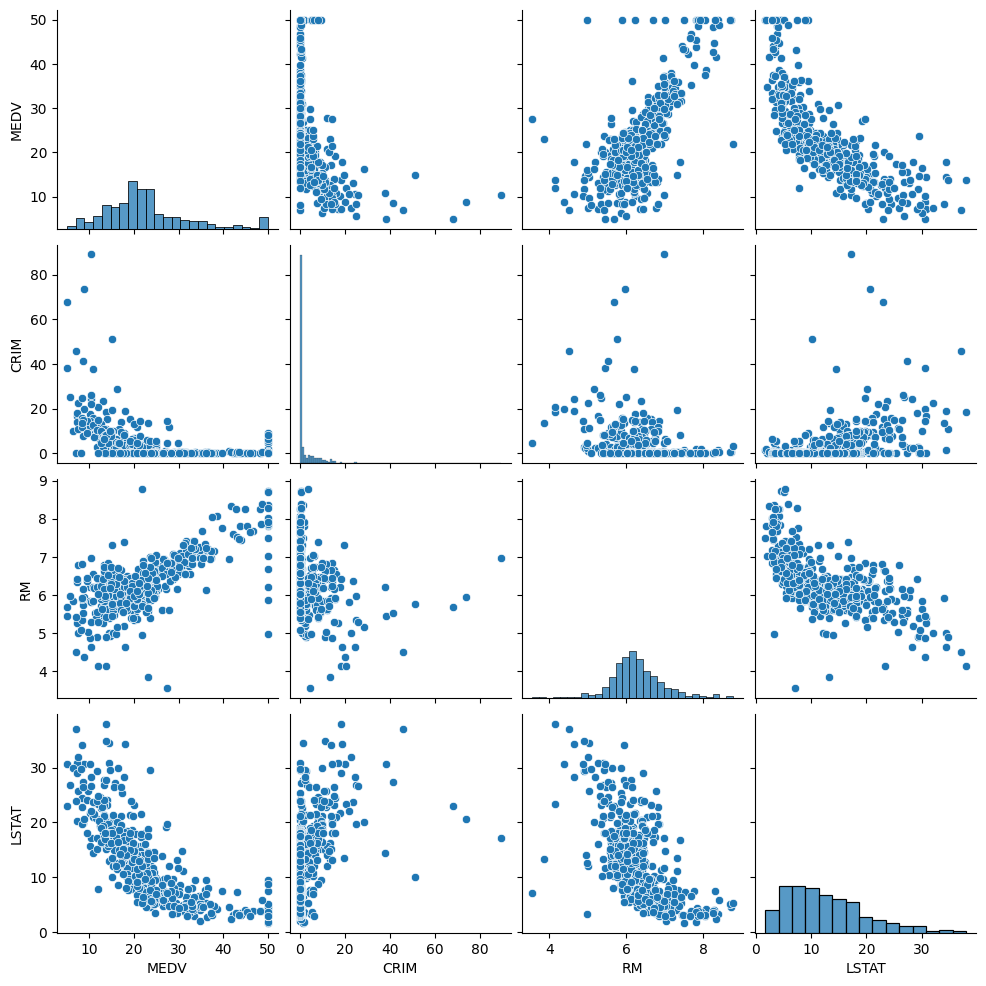

Crim coef:-0.3883046085868116 crim valor p: 1.1739870821943559e-19
RM coef:0.6953599470715395 RM valor p: 2.4872288710076306e-74
LSTAT coef:-0.7376627261740148 RM valor p: 5.081103394387441e-88


In [14]:
#Análisis de la existencia de relación lineal entre las variables
matriz_correlacion= boston_df_recortado.corr(method='pearson')
print(matriz_correlacion)

sns.pairplot(boston_df_recortado)
plt.show()


coeficiente1, valor_p1= pearsonr(boston_df_recortado['MEDV'], boston_df_recortado['CRIM'])
print(f'Crim coef:{coeficiente1}', f'crim valor p: {valor_p1}')

coeficiente2, valor_p2= pearsonr(boston_df_recortado['MEDV'], boston_df_recortado['RM'])
print(f'RM coef:{coeficiente2}', f'RM valor p: {valor_p2}')


coeficiente3, valor_p3= pearsonr(boston_df_recortado['MEDV'], boston_df_recortado['LSTAT'])
print(f'LSTAT coef:{coeficiente3}', f'RM valor p: {valor_p3}')

R\ observamos un valor p menor a la significancia para las 3 variables indpendientes en la prueba de pearson individual con la vble dependiente. En este caso rechazamos Ho y confirmamos H1, que si hay correlacion

<div style="background-color:#5DADE2"><b>Apartado 3: Estimación de un modelo de regresión lineal simple entre las variables</b></div>

In [15]:
modelo_boston= LinearRegression()
x=boston_df_recortado[['CRIM','RM','LSTAT']]
y=boston_df_recortado['MEDV']

modelo_boston.fit(x,y)
print(modelo_boston.intercept_)
print(modelo_boston.coef_)


-2.5622510119283675
[-0.10294089  5.21695492 -0.57848582]


**<u>Interpretación resultados</u>.-** En este modelo de regresión lineal múltiple, la variable dependiente es el valor medio de las viviendas (`MEDV`) y las variables independientes son la tasa de criminalidad per cápita (`CRIM`), el número promedio de habitaciones por vivienda (`RM`) y el porcentaje de población con bajo estatus socioeconómico (`LSTAT`). 

- **Intercepto ($\beta_0 = -2.56$)**:  
  Representa el valor teórico de `MEDV` cuando todas las variables independientes son 0, aunque no es un caso realista.

- **Coeficiente de $\beta_1 = -0.103$** (`CRIM`):  
  Por cada unidad adicional de criminalidad, `MEDV` disminuye en promedio **103 dólares**, manteniendo constantes las demás variables.

- **Coeficiente de $\beta_2 = 5.217$** (`RM`):  
  Por cada habitación promedio adicional, `MEDV` aumenta en promedio **5,217 dólares**.

- **Coeficiente de $\beta_3 = -0.578$** (`LSTAT`):  
  Por cada incremento de una unidad en el porcentaje de población de bajo estatus, `MEDV` disminuye en promedio **578 dólares**.

Estos resultados indican que viviendas más grandes y en zonas con menor criminalidad y estatus socioeconómico bajo tienden a tener mayores valores.

<div style="background-color:#5DADE2"><b>Apartado 4: Interpretación de las salidas de estimación de un modelo de regresión lineal simple</b></div>

In [17]:

# ¿Cuáles son los valores ajustados de la variable dependiente?
y_predict = modelo_boston.predict(x)
print(y_predict[:100])


[28.85771765 25.64564485 32.58746301 32.24191904 31.63288835 27.96578525
 21.6024146  18.54391123  9.47859635 18.85073477 18.85308515 21.09783184
 19.06273052 23.63029291 23.23936953 22.90910504 24.48544728 20.12019577
 19.05632414 20.7152153  14.20755562 20.46871647 18.52416004 16.16186001
 18.83643867 17.01015279 19.12736596 18.89005264 23.83768045 25.22225294
 14.05202636 21.43218812 12.3059078  16.44583514 17.30787951 22.7835941
 21.29942894 22.87536497 22.68402091 29.34166372 32.93278067 29.94354367
 26.24557517 25.51991687 23.56227903 21.15650052 19.41808589 17.99685252
  7.75480692 17.26903688 20.75668298 23.87984253 28.34541974 23.84728168
 19.59218946 32.47158889 27.39759366 30.71002065 25.51162506 23.01436983
 19.76582755 20.19109085 27.21384912 27.20616088 29.84017755 27.54717728
 21.70006456 23.41131565 19.03506285 23.04144546 27.01843847 22.8042345
 25.87590538 25.63573579 26.23344516 25.05007268 23.26008211 23.51983979
 22.80548502 22.8092876  29.46778082 27.78751279 26.4

In [18]:
# ¿Cuáles son los residuos estimados?
# Cálculo de los residuos
residuos = y - y_predict
print("Residuos estimados (primeros 5):", residuos[:5])

# Verificación: y = y_pred + residuos
verificacion = y[:5] - (y_predict[:5] + residuos[:5])
print("\nVerificación (debe ser cercana a cero):", verificacion)

Residuos estimados (primeros 5): 0   -4.857718
1   -4.045645
2    2.112537
3    1.158081
4    4.567112
Name: MEDV, dtype: float64

Verificación (debe ser cercana a cero): 0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: MEDV, dtype: float64


In [19]:
# 4.4 ¿Cuáles son los grados de libertad?
n_samples = X.shape[0] # Número de datos/muestras
k_parameters = X.shape[1]  # Número de parámetros (incluyendo el intercepto)

# Calculamos los grados de libertad totales
gdlt = n_samples - 1
print("Grados de libertad totales:", gdlt)

# Calculamos los grados de libertad del modelo
gdlm = k_parameters
print("Grados de libertad del modelo:", gdlm)

# Calculamos los grados de libertad residuales
gdlr = n_samples - k_parameters - 1
print("Grados de libertad residuales:", gdlr)

Grados de libertad totales: 152
Grados de libertad del modelo: 5
Grados de libertad residuales: 147


In [20]:
# 4.5 Medir la discrepancia entre los valors observados y los valores predichos
# 1. MAE
mae = mean_absolute_error(y, y_predict)
print(f"MAE: {mae}")

# 2. MSE
mse = mean_squared_error(y, y_predict)
print(f"MSE: {mse}")

# 3. RMSE
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

# 4. R²
r2 = r2_score(y, y_predict)
print(f"R²: {r2}")

# 5. MAPE (manual, porque scikit-learn no lo incluye)
mape = np.mean(np.abs((y - y_predict) / y)) * 100
print(f"MAPE: {mape:.2f}%")

MAE: 3.8912949765069462
MSE: 29.897012619392303
RMSE: 5.4678160740273904
R²: 0.6458520515781131
MAPE: 20.01%


R\ **<u>Interpretación resultados</u>.-**

- **MAE (Error Absoluto Medio): 3.891**  
  Este valor indica que, en promedio, el modelo comete un error absoluto de aproximadamente **3.89 miles de dólares** al predecir el valor medio de las viviendas (**MEDV**). Esto sugiere que las predicciones están razonablemente cerca de los valores observados, aunque podrían mejorarse.

- **MSE (Error Cuadrático Medio): 29.897**  
  El MSE refleja la variabilidad de los errores al cuadrado. Un valor de **29.897** muestra que el modelo tiene discrepancias significativas, especialmente cuando se producen grandes errores en las predicciones.

- **RMSE (Raíz del Error Cuadrático Medio): 5.468**  
  El RMSE, que está en la misma escala que **MEDV**, indica que el error promedio en las predicciones es de aproximadamente **5.47 miles de dólares**. Esto confirma que hay discrepancias moderadas entre los valores predichos y los observados.

- **R² (Coeficiente de Determinación): 0.6458**  
  El $R^2$ indica que el **64.58%** de la variabilidad en el valor medio de las viviendas (**MEDV**) es explicado por las variables independientes (**CRIM**, **RM** y **LSTAT**). Esto sugiere que el modelo captura bien las relaciones entre las variables, aunque hay espacio para mejorar incluyendo factores adicionales.

- **MAPE (Error Porcentual Absoluto Medio): 20.01%**  
  Este porcentaje indica que, en promedio, las predicciones del modelo están desviadas en un **20.01%** respecto a los valores reales. Aunque este error es aceptable en algunos contextos, indica que las predicciones aún no son del todo precisas.

**En resumen**, el modelo tiene un ajuste moderado, explicando aproximadamente el 64.58% de la variabilidad en los valores de las viviendas. Los errores, reflejados por el MAE, MSE y RMSE, son significativos pero no extremadamente altos, lo que sugiere que las predicciones del modelo son razonables. Sin embargo, el MAPE del 20.01% y los valores de error indican que hay margen para mejorar la precisión del modelo, posiblemente incluyendo más variables relevantes o probando técnicas de modelado avanzadas.


<div style="background-color:#5DADE2"><b>Apartado 5: Comparación entre Regresión Lineal Simple y Regresión Lineal Múltiple</b></div>

R\ **<u>Interpretación de resultados</u>:**

1. **MAE, MSE y RMSE**:  
   Los valores de error (MAE, MSE y RMSE) son considerablemente más bajos en el modelo de regresión lineal múltiple, lo que indica que incluir las variables adicionales (**RM** y **LSTAT**) mejora significativamente la capacidad del modelo para predecir el valor medio de las viviendas (**MEDV**). Las predicciones en el modelo múltiple son más cercanas a los valores reales en comparación con el modelo simple.

2. **R² (Coeficiente de Determinación)**:  
   El $R^2$ aumenta drásticamente al pasar de la regresión simple (15.08%) a la múltiple (64.59%). Esto refleja que las variables adicionales explican una parte importante de la variabilidad en **MEDV** que no es capturada por **CRIM** sola. Sin embargo, todavía queda un porcentaje de variabilidad que podría explicarse con más factores no incluidos en el modelo.

3. **MAPE (Error Relativo Medio)**:  
   El modelo múltiple reduce el MAPE del 31.19% al 20.01%, lo que indica una mejora notable en la precisión relativa de las predicciones.

**Conclusión**:  
El modelo de regresión lineal múltiple ofrece una mejora significativa respecto al modelo simple al incluir **RM** y **LSTAT** junto con **CRIM**. Esto se traduce en errores más bajos y un mejor ajuste general, como lo reflejan el $R^2$ y el MAPE. Sin embargo, para lograr un ajuste aún mejor, podrían incluirse más variables explicativas relevantes o explorar técnicas de modelado avanzadas.


### Ejercicio 4

Utilizando el dataset del ejercicio anterior encontrar el mejor modelo de regresión lineal múltiple para la variable dependiente `MEDV` en función del resto de variables independentienes (todas las columnas del dataset `boston_df`, excepto `MEDV` que es la variable dependiente). 

Automatiza la búsqueda de que conjunto de variables independientes explican mejor la variable dependiente `MEDV` utilizando el algoritmo **SFFS (Sequential Floating Forward Selection)** de la librería `mlxtend` ([http://rasbt.github.io/mlxtend/](http://rasbt.github.io/mlxtend/)), tal y como vimos en el apartado 3 del Notebook teórico 3.2. Comparar sus métricas y realizar la diagnosis del modelo de regresión lineal elegido en base los criterios de selección $R^2_{adj}$, $AIC$ y $BIC$.

1. Automatización del proceso de selección del mejor modelo

<mark>**Nota!-** Recuerda tratar (valores medio) los valores `np.nan` de todas las variables independientes</mark>

<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 04</b></div>

<div style="background-color:#5DADE2"><b>Apartado 1: Automatización del proceso de selección del mejor modelo</b></div>

In [ ]:
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

def calculate_aic_bic(model, X, y):
    ols_model = sm.OLS(y, sm.add_constant(X)).fit()
    return ols_model.aic, ols_model.bic, adjusted_r2(ols_model.rsquared, len(y), X.shape[1])

In [ ]:
y= boston_df['MEDV']
X= boston_df.drop(columns='MEDV')


In [21]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import statsmodels.api as sm
for k in range(1, X.shape[1]+1):
    # Definimos el modelo de Regresión Lineal Múltiple
    model = LinearRegression()
    
    # Configuración del algoritmo SFFS con la métrica r2
    sffs = SFS(
        model,
        k_features=k,
        forward=True,
        floating=True,
        scoring='r2',
        cv=None
    )
    
    # Ejecutamos el algoritmo SFFS
    sffs = sffs.fit(X, y)
    
    # Seleccionar las mejores k combinaciones de características
    best_features = list(sffs.k_feature_names_)

    # Evaluar el mejor modelo
    X_selected = X[best_features]
    model.fit(X_selected, y)
    
    # Calcular métricas
    r2 = r2_score(y, model.predict(X_selected))
    aic, bic, r2_adj = calculate_aic_bic(model, X_selected, y)

    # Mostramos los resultados
    print(f"- La combinación de {k} variables independientes {best_features} obtuvo: R2={r2}, R2 Adj={r2_adj}, AIC={aic} y BIC={bic}\n")

- La combinación de 1 variables independientes ['LSTAT'] obtuvo: R2=0.5441462975864797, R2 Adj=0.543241825954707, AIC=3286.974956900157 y BIC=3295.428030238732

- La combinación de 2 variables independientes ['RM', 'LSTAT'] obtuvo: R2=0.6385616062603403, R2 Adj=0.6371244754701231, AIC=3171.5423142992013 y BIC=3184.2219243070635

- La combinación de 3 variables independientes ['RM', 'PTRATIO', 'LSTAT'] obtuvo: R2=0.6786241601613111, R2 Adj=0.6767035874132712, AIC=3114.0972674193326 y BIC=3131.0034140964826

- La combinación de 4 variables independientes ['RM', 'DIS', 'PTRATIO', 'LSTAT'] obtuvo: R2=0.6903077016842538, R2 Adj=0.6878351084841281, AIC=3097.359044862759 y BIC=3118.4917282091965

- La combinación de 5 variables independientes ['NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT'] obtuvo: R2=0.7080892893529661, R2 Adj=0.7051701822464959, AIC=3069.438633167217 y BIC=3094.797853182942

- La combinación de 6 variables independientes ['CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT'] obtuvo: R2=0

El mejor modelo es: 
- La combinación de 11 variables independientes ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'] obtuvo: R2=0.7405822802569575, R2 Adj=0.7348057723274564, AIC=3021.726387825062 y BIC=3072.4448278565114

EL R2 adj va subiendo en cada iteracion hasta aqui. En la siguiente iteracion con 12 variables dismininuye levemente y ademas de eso las metricas de aic y bic, que se basan en la suma de cuadrados del error aumentan, lo cual puede sugerir que el modelo pierde capacidad y que en este punto se tienen ya muchos parametros que podrian repercutir en un sobreajuste del modelo. 

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>